In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import dlib
plt.rcParams['figure.figsize'] = [15, 10]

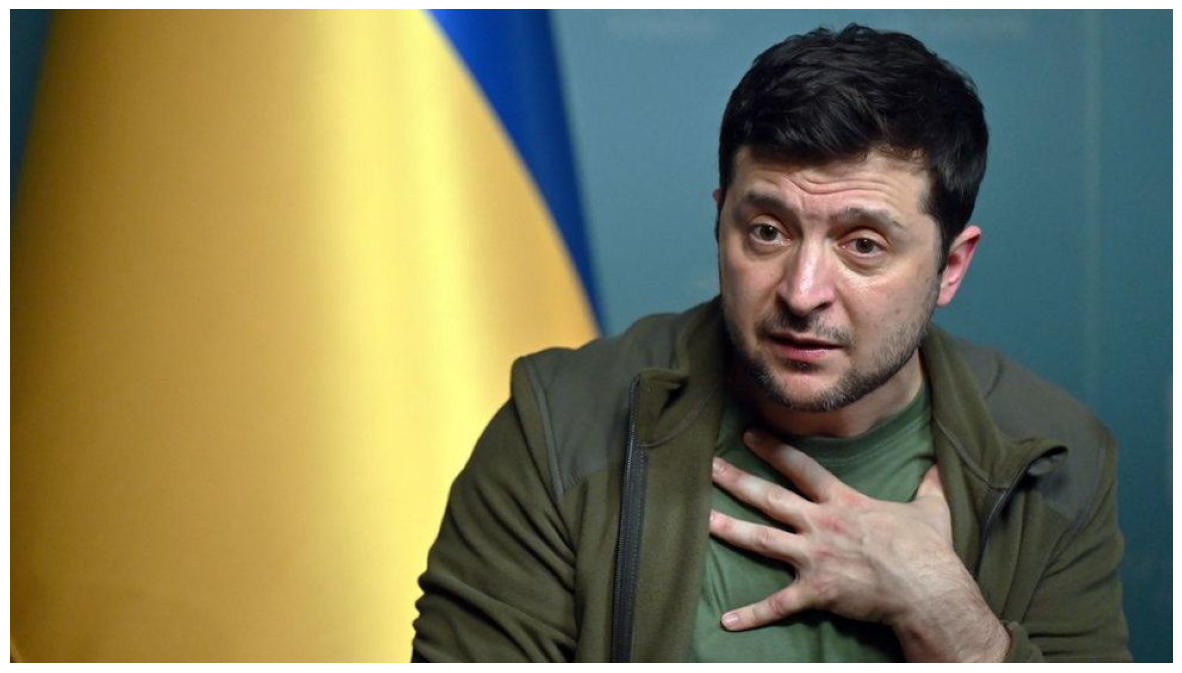

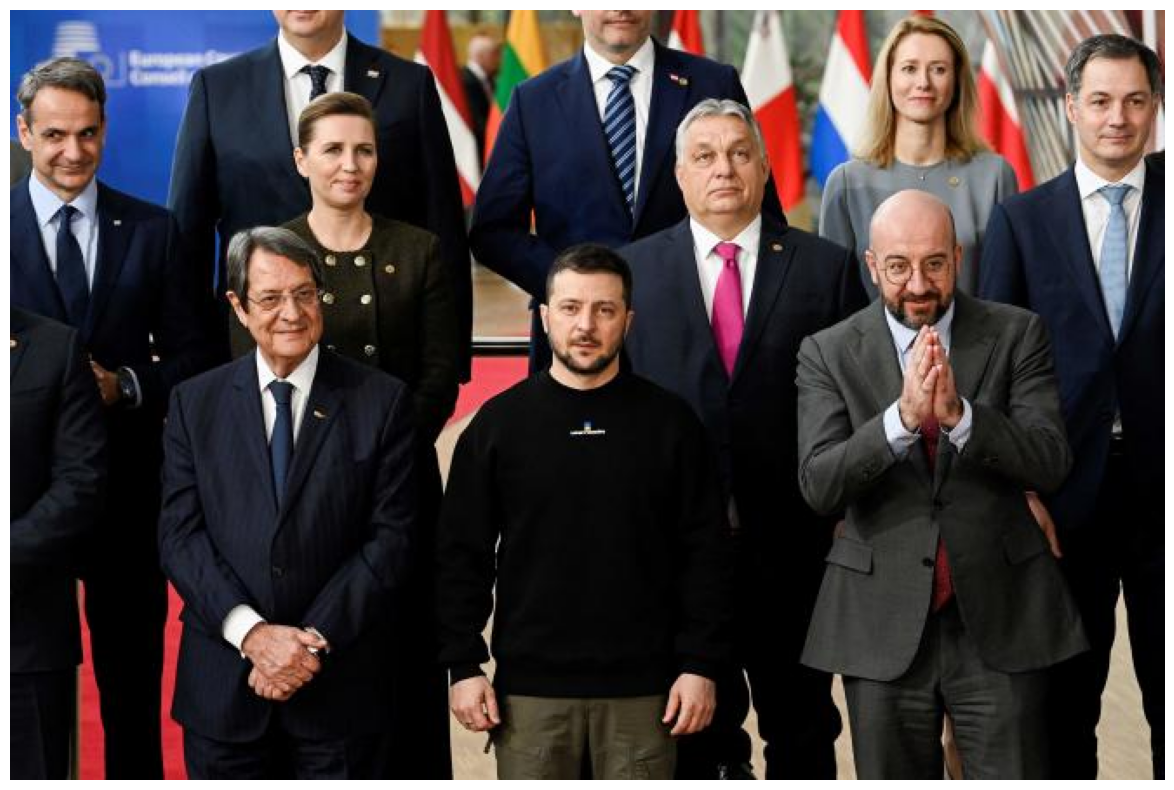

In [9]:
img1 = cv2.imread('zelensky.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis("off")
plt.show()

img2 = cv2.imread('eu_summit.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.axis("off")
plt.show()

Number of detected faces: 8
rectangles[[(170, 65) (213, 108)], [(309, 161) (352, 204)], [(616, 41) (660, 84)], [(383, 67) (435, 118)], [(501, 22) (544, 65)], [(12, 60) (55, 103)], [(136, 151) (180, 194)], [(492, 130) (544, 182)]]
<bound method PyCapsule.left of rectangle(170,65,213,108)>
<class 'float'>
170 65 43 43
309 161 43 43
616 41 44 43
383 67 52 51
501 22 43 43
12 60 43 43
136 151 44 43
492 130 52 52


(-0.5, 663.5, 442.5, -0.5)

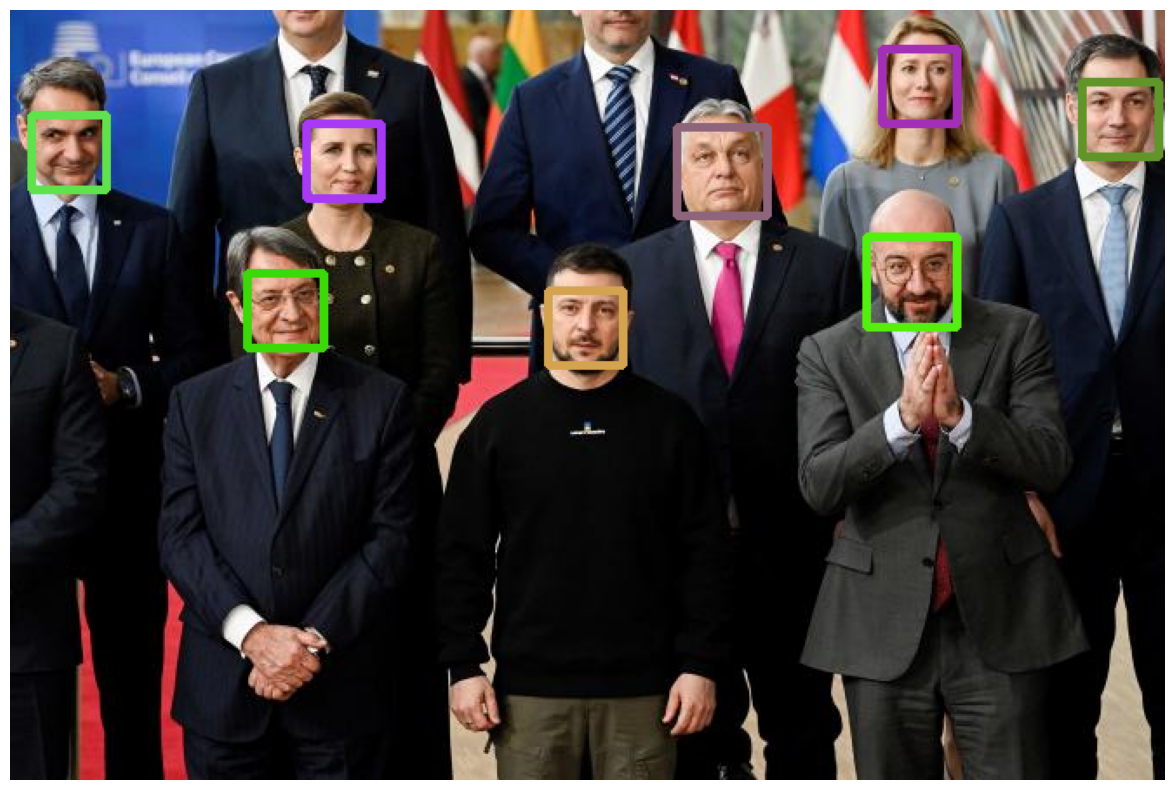

In [24]:
detector = dlib.get_frontal_face_detector()
rects = detector(img2, 1)

print('Number of detected faces:', len(rects))
print(rects)
print(rects[0].left)

colors = np.zeros_like(rects)
for i in range(len(colors)):
    colors[i] = (np.random.uniform(0,255),np.random.uniform(0,255),np.random.uniform(0,255))

print(type(colors[0][0]))

def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

result_dlib = np.copy(img2)
faces_dlib_img = []
for rect,color in zip(rects,colors):    
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), color, 3)
    faces_dlib_img.append(img2[y:y+h, x:x+w, :])   

plt.imshow(result_dlib)
plt.axis("off")